<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/mediation-and-moderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

set seed - reminder

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [1]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
  # Generate ages uniformly between age_lo and age_hi
  age <- runif(sample_size, min = age_lo, max = age_hi)
  
  # Generate word reading experience based on age
  epsilon_x <- rnorm(sample_size, mean = 0, sd = sd_x)
  x <- beta_xa * age + beta_x0 + epsilon_x
  
  # Generate reading comprehension based on age and word reading experience
  epsilon_c <- rnorm(sample_size, mean = 0, sd = sd_c)
  c <- beta_ca * age + beta_cx * x + beta_c0 + epsilon_c
  
  # Return a data frame with all variables
  return(data.frame(age = age, x = x, c = c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,80.45599,106.07438,399.2954
2,89.78210,20.94041,138.2945
3,163.00162,117.18089,498.7137
4,183.22026,79.22579,443.7561
5,83.47679,63.89298,254.5290
6,188.49721,79.10823,221.5908


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [6]:
#library(tidyverse)
library (dplyr)
library(ggplot2)

a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula = 'y ~ x'


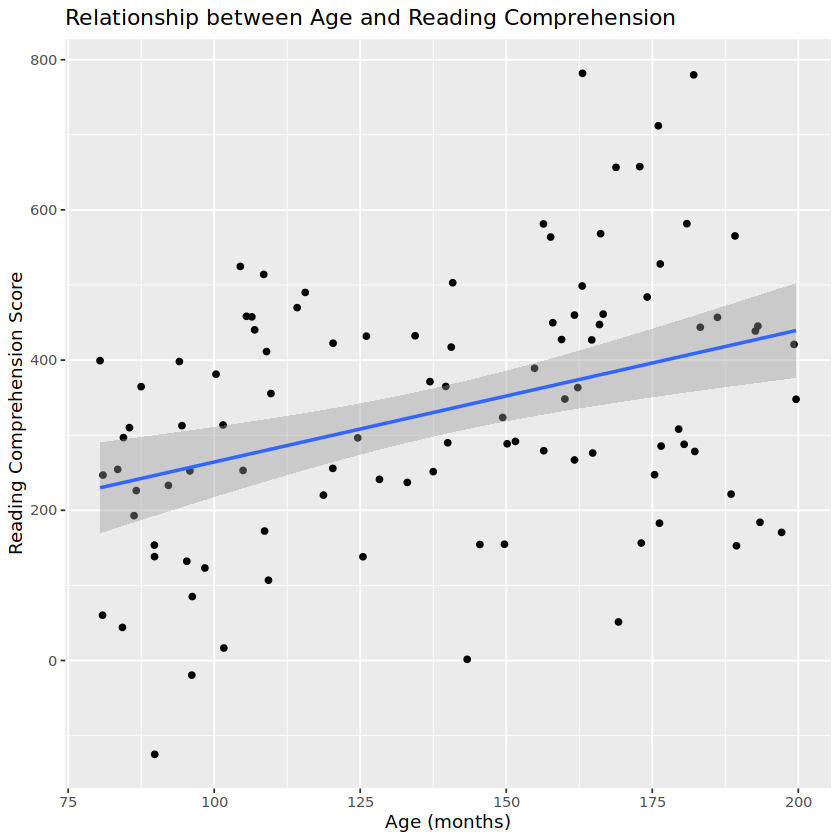

In [7]:
# Plot relationship between age and reading comprehension
ggplot(dat, aes(x = age, y = c)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Relationship between Age and Reading Comprehension",
       x = "Age (months)",
       y = "Reading Comprehension Score")

b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


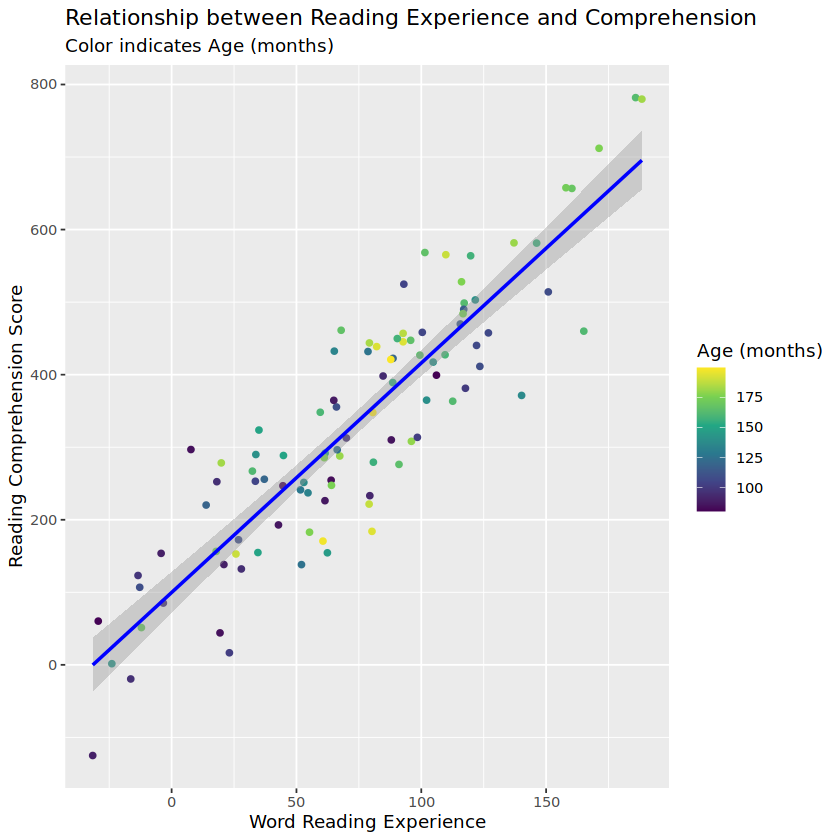

In [13]:
# Plot relationship between experience, age, and comprehension
ggplot(dat, aes(x = x, y = c)) +
  geom_point(aes(color = age)) +  # color
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  
  scale_color_viridis_c() +
  labs(title = "Relationship between Reading Experience and Comprehension",
       subtitle = "Color indicates Age (months)",
       x = "Word Reading Experience",
       y = "Reading Comprehension Score",
       color = "Age (months)")

---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [11]:
library(mediation)

Loading required package: MASS

Warning message:
“package ‘MASS’ was built under R version 4.2.3”



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.2”
Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [12]:
# Fit mediator model - effect of age on reading experience
med_model <- lm(x ~ age, data = dat)

# Fit outcome model - effect of age and reading experience on comprehension
out_model <- lm(c ~ age + x, data = dat)

# Run mediation analysis
med_results <- mediate(med_model, out_model, 
                       treat = "age", mediator = "x",
                       boot = TRUE, sims = 1000)

# Print summary of mediation results
summary(med_results)

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.455        0.675         2.29  <2e-16 ***
ADE               0.303       -0.183         0.74    0.24    
Total Effect      1.758        0.881         2.67  <2e-16 ***
Prop. Mediated    0.828        0.590         1.13  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> growing older alone doesn't predict improved reading comprehension as much as reading experience (which accumulates with age). The visualizations support this the mediation analysis output that while age and comprehension are correlated moderately, reading experience is a superior predictor to comprehension.

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*